## Import laibary

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Weather in Szeged 2006-2016
This dataset contains weather data for Szeged, a city in Hungary, from 2006 to 2016. The data was obtained from Dark Sky API, which provides historical and forecast weather information for any location in the world. The dataset has 96453 rows and 12 columns, each representing an hourly observation of the weather conditions. The columns are:

* time: The date and time of the observation, in ISO 8601 format.
* summary: A brief description of the weather, such as "Clear" or "Rain".
precipType: The type of precipitation occurring at the time of the observation, such as "rain", "snow", or "sleet".
* temperature: The air temperature, in degrees Celsius, at the time of the observation.
* apparentTemperature: The temperature as perceived by a human, in degrees Celsius, at * the time of the observation. This takes into account factors such as wind chill and humidity.
* humidity: The relative humidity, as a percentage, at the time of the observation.
* windSpeed: The wind speed, in meters per second, at the time of the observation.
* windBearing: The direction that the wind is coming from, in degrees, at the time of the observation. 0° means the wind is coming from the north, 90° means the wind is coming from the east, and so on.
* visibility: The average visibility, in kilometers, at the time of the observation.
* loudCover: The percentage of the sky covered by clouds, at the time of the observation.
* pressure: The sea-level air pressure, in hectopascals, at the time of the observation.
* Daily Summary: A description of the daily weather, such as "Partly cloudy throughout the day."

In [4]:
df=pd.read_csv('/kaggle/input/szeged-weather/weatherHistory.csv')

In [5]:
# show data top 3 row
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
# show all columns name
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [7]:
#show all null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

some data is missing from the 'Precip_Type' column, but still lets investigate.

#### Handle messing values

In [8]:
#drop all nan value
df.dropna(axis=0, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Loud Cover                95936 non-null  float64
 10  Pressure (millibars)      95936 non-null  float64
 11  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [10]:
#show again null values
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [11]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# Exploratory Data Analysis

In [12]:
df['Summary'].value_counts(normalize=True)

Summary
Partly Cloudy                          0.329751
Mostly Cloudy                          0.290965
Overcast                               0.172156
Clear                                  0.112189
Foggy                                  0.074185
Breezy and Overcast                    0.005504
Breezy and Mostly Cloudy               0.005379
Breezy and Partly Cloudy               0.004024
Dry and Partly Cloudy                  0.000896
Windy and Partly Cloudy                0.000698
Light Rain                             0.000657
Breezy                                 0.000563
Windy and Overcast                     0.000469
Humid and Mostly Cloudy                0.000417
Drizzle                                0.000407
Breezy and Foggy                       0.000365
Windy and Mostly Cloudy                0.000365
Dry                                    0.000354
Humid and Partly Cloudy                0.000177
Dry and Mostly Cloudy                  0.000146
Rain                            

In [13]:
df = df.drop(['Formatted Date', 'Temperature (C)', 'Loud Cover', 'Daily Summary'], axis = 1)
df.head(3)

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94


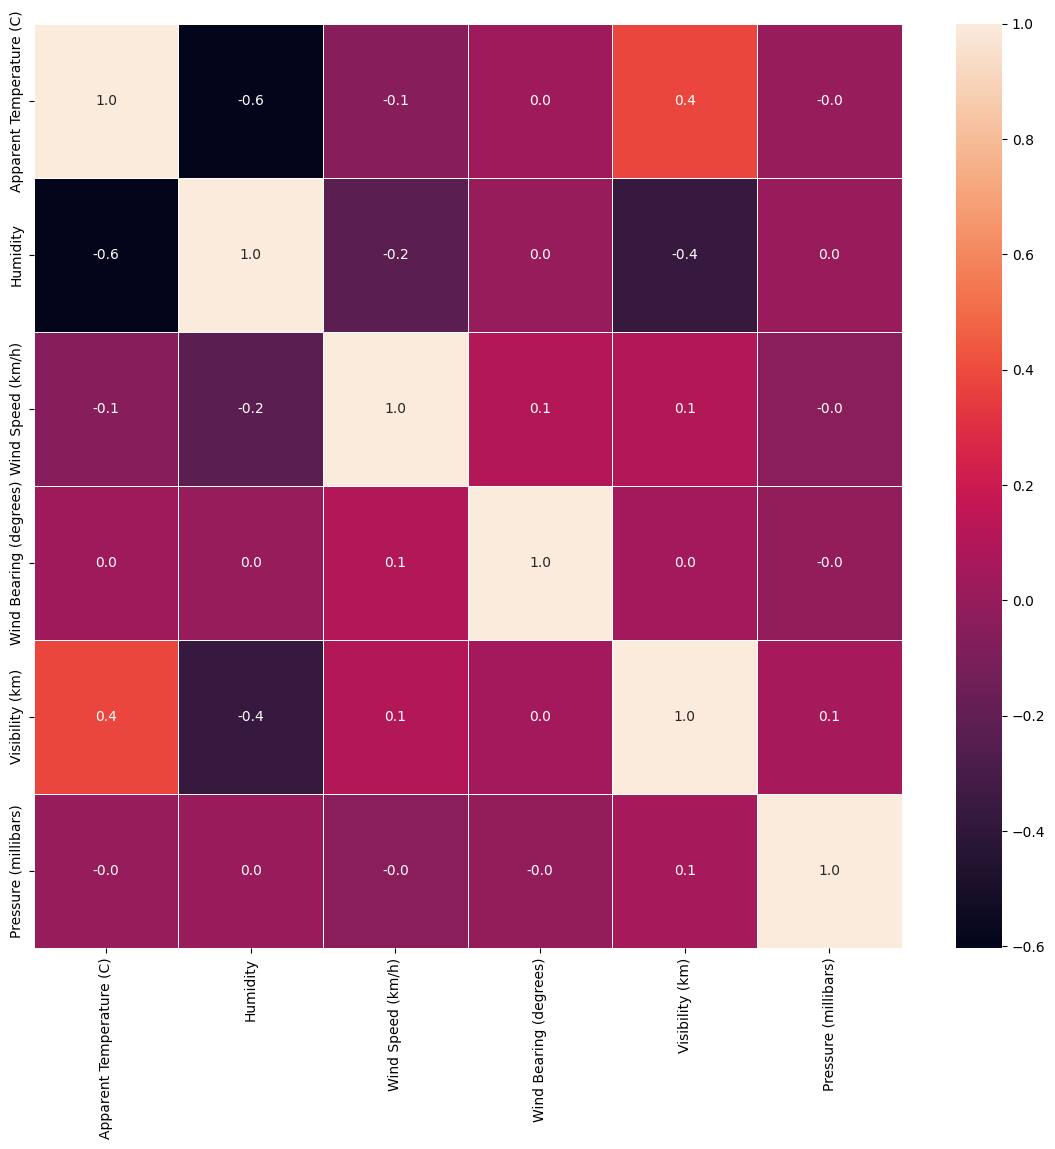

In [14]:
#heatmap show co-relations numeric columns
f,ax = plt.subplots(figsize=(14,12))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### Dealing with outliers

We visualize each numeric variable in the dataset using a boxplot to detect the outliers. The outliers are the dots on the boxplots.

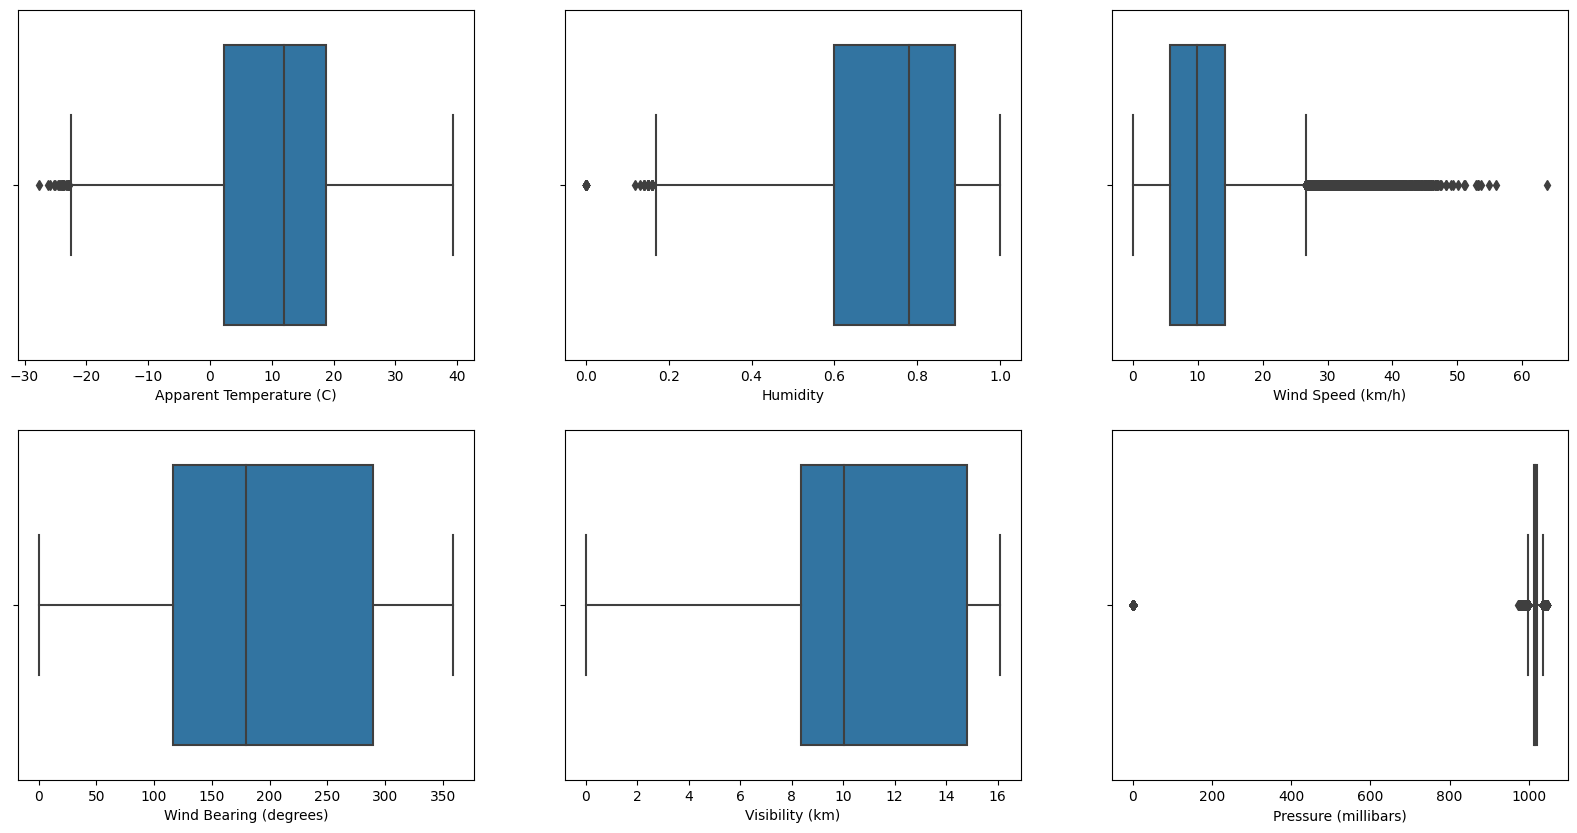

In [15]:
num_atts = df.select_dtypes(exclude=['object']).columns # numeric attributes' data type are not object

fig, axes = plt.subplots(int(np.ceil(len(num_atts)/3)), 3, figsize = (20, 10))
for i, att in zip(range(len(num_atts)), num_atts):
    sns.boxplot(ax = axes[int(np.floor(i/3))][i%3], 
                x = att, data = df)

To remove the outliers (observations outside the left most and right most lines on boxplots), we will use InterQuartile Range (IQR). The left line ( 
l1
 ) equals the difference between the first quartile ( 
Q1
 /25th percentile) and  
1.5IQR
 . The right line ( 
l2
 ) equals the addition between the third quartile ( 
Q3
 /75th percentile) and  
1.5IQR

l1 = Q1 − 1.5∗ IQR <br>
l2 = Q3 − 1.5∗ IQR <br>

where 

IQR=Q3−Q1
 .



# Apparent Temperature (C)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Apparent Temperature (C)', ylabel='Count'>

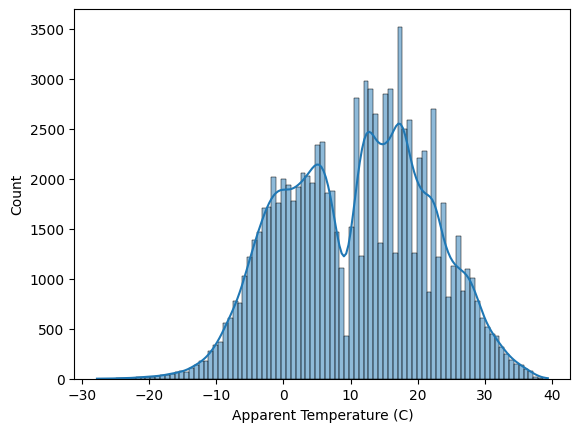

In [16]:
sns.histplot(df['Apparent Temperature (C)'], kde = True)

In [17]:
iqr = df['Apparent Temperature (C)'].quantile(0.75) - df['Apparent Temperature (C)'].quantile(0.25)
l1 = df['Apparent Temperature (C)'].quantile(0.25) - 1.5*iqr
l2 = df['Apparent Temperature (C)'].quantile(0.75) + 1.5*iqr

data_1 = df[np.logical_and(df['Apparent Temperature (C)'] < l2, df['Apparent Temperature (C)'] > l1)]
data_1.describe(include = 'all')


,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95914,95914,95914.000000,95914.000000,95914.000000,95914.000000,95914.000000,95914.000000
unique,27,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN
freq,31634,85224,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.870565,0.734858,10.804741,187.527858,10.363780,1003.144436
std,NaN,NaN,10.705888,0.195686,6.921031,107.384162,4.172966,117.289786
min,NaN,NaN,-22.416667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.283333,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,NaN,NaN,12.036111,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,NaN,NaN,18.844444,0.890000,14.135800,290.000000,14.812000,1021.040000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Apparent Temperature (C)', ylabel='Count'>

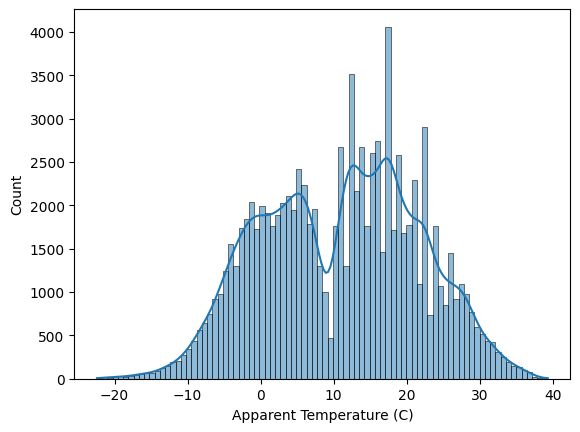

In [18]:
sns.histplot(data_1['Apparent Temperature (C)'], kde = True)

## Humidity

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Humidity', ylabel='Count'>

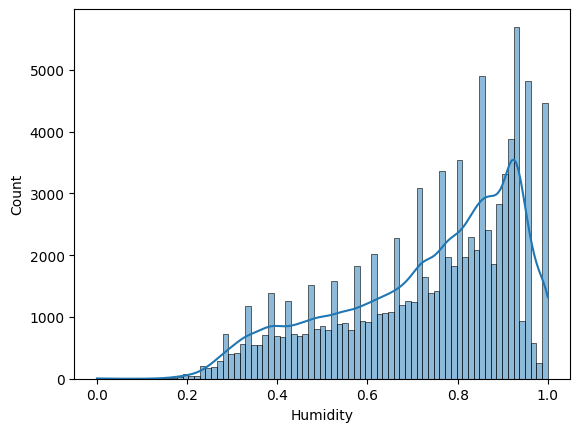

In [19]:
sns.histplot(data_1['Humidity'], kde = True)

In [20]:
iqr = data_1['Humidity'].quantile(0.75) - data_1['Humidity'].quantile(0.25)
l1 = data_1['Humidity'].quantile(0.25) - 1.5*iqr
l2 = data_1['Humidity'].quantile(0.75) + 1.5*iqr

data_2 = data_1[np.logical_and(data_1['Humidity'] < l2, data_1['Humidity'] > l1)]
data_2.describe(include = 'all')

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95872,95872,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000
unique,27,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN
freq,31621,85199,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.871607,0.735142,10.803113,187.545394,10.364451,1003.136558
std,NaN,NaN,10.696341,0.195250,6.919332,107.380234,4.173079,117.314662
min,NaN,NaN,-22.416667,0.170000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.283333,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,NaN,NaN,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,NaN,NaN,18.844444,0.890000,14.119700,290.000000,14.812000,1021.040000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Humidity', ylabel='Count'>

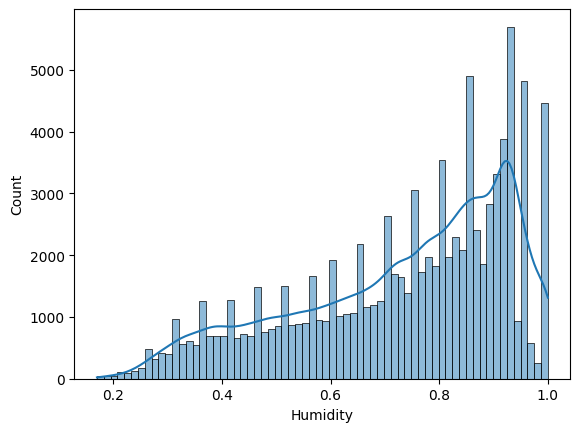

In [21]:
sns.histplot(data_2['Humidity'], kde = True)

# Wind Speed (km/h)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Wind Speed (km/h)', ylabel='Count'>

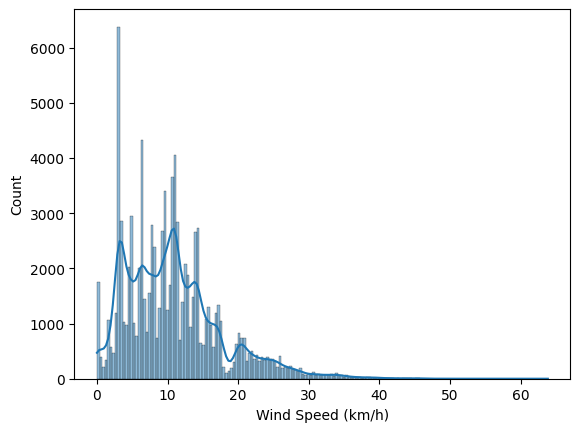

In [22]:
sns.histplot(data_2['Wind Speed (km/h)'], kde = True)

In [23]:
iqr = data_2['Wind Speed (km/h)'].quantile(0.75) - data_2['Wind Speed (km/h)'].quantile(0.25)
l1 = data_2['Wind Speed (km/h)'].quantile(0.25) - 1.5*iqr
l2 = data_2['Wind Speed (km/h)'].quantile(0.75) + 1.5*iqr

data_3 = data_2[np.logical_and(data_2['Wind Speed (km/h)'] < l2, data_2['Wind Speed (km/h)'] > l1)]
data_3.describe(include = 'all')

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,92859,92859,92859.000000,92859.000000,92859.000000,92859.000000,92859.000000,92859.000000
unique,14,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN
freq,31268,82441,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.990797,0.737798,10.131126,186.286714,10.342534,1003.892538
std,NaN,NaN,10.695190,0.195202,5.864568,107.232139,4.203960,114.828027
min,NaN,NaN,-22.416667,0.170000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.394444,0.610000,5.457900,112.000000,8.202950,1012.080000
50%,NaN,NaN,12.116667,0.790000,9.660000,180.000000,10.046400,1016.530000
75%,NaN,NaN,18.888889,0.900000,13.829900,289.000000,14.876400,1021.150000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Wind Speed (km/h)', ylabel='Count'>

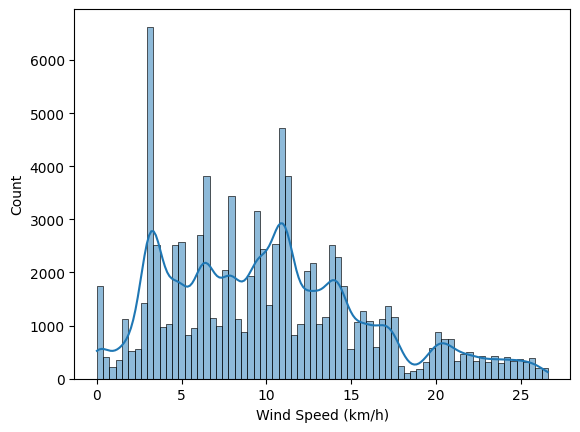

In [24]:
sns.histplot(data_3['Wind Speed (km/h)'], kde = True)

### Visibility (km)
'Visibility' boxplot shows no outlier.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Visibility (km)', ylabel='Count'>

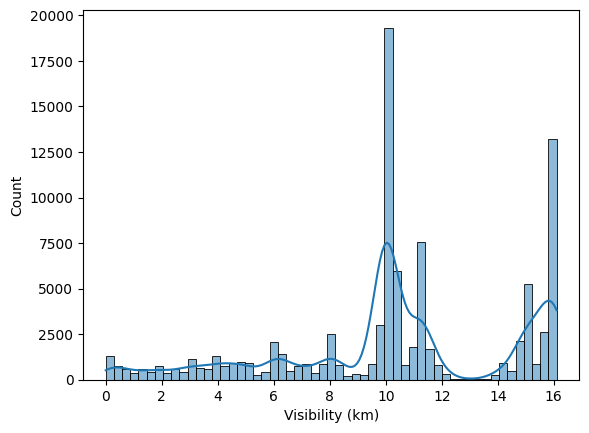

In [25]:
sns.histplot(data_3['Visibility (km)'], kde = True)

## Pressure (millibars)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pressure (millibars)', ylabel='Count'>

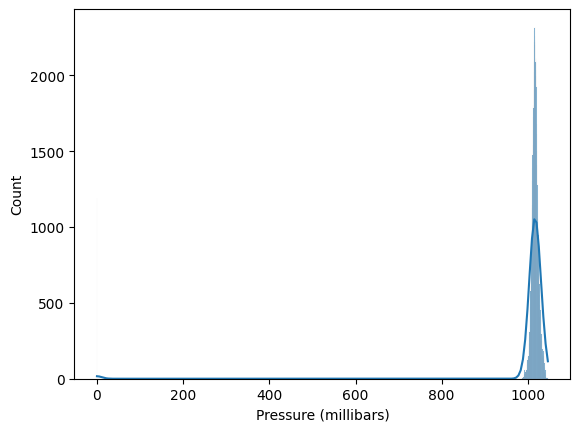

In [26]:
sns.histplot(data_3['Pressure (millibars)'], kde = True)

In [27]:
iqr = data_3['Pressure (millibars)'].quantile(0.75) - data_3['Pressure (millibars)'].quantile(0.25)
l1 = data_3['Pressure (millibars)'].quantile(0.25) - 1.5*iqr
l2 = data_3['Pressure (millibars)'].quantile(0.75) + 1.5*iqr

data_4 = data_3[np.logical_and(data_3['Pressure (millibars)'] < l2, data_3['Pressure (millibars)'] > l1)]
data_4.describe(include = 'all')

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,88670,88670,88670.000000,88670.000000,88670.000000,88670.000000,88670.000000,88670.000000
unique,14,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN
freq,30726,79721,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,11.395068,0.734215,10.135426,186.577163,10.475150,1016.772873
std,NaN,NaN,10.573942,0.196144,5.836954,107.278915,4.150998,6.724339
min,NaN,NaN,-22.416667,0.170000,0.000000,0.000000,0.000000,998.480000
25%,NaN,NaN,2.933333,0.600000,5.554500,113.000000,8.903300,1012.350000
50%,NaN,NaN,12.327778,0.780000,9.660000,180.000000,10.046400,1016.560000
75%,NaN,NaN,19.044444,0.890000,13.813800,289.000000,14.908600,1020.910000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pressure (millibars)', ylabel='Count'>

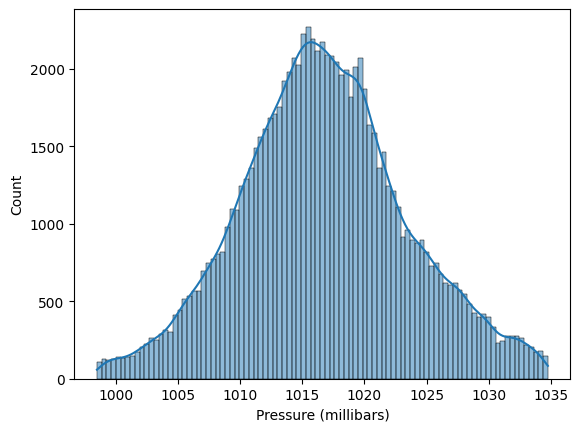

In [28]:
sns.histplot(data_4['Pressure (millibars)'], kde = True)

In [32]:
data_cleaned = data_4.reset_index(drop = True)

## Checking the OLS assumptions

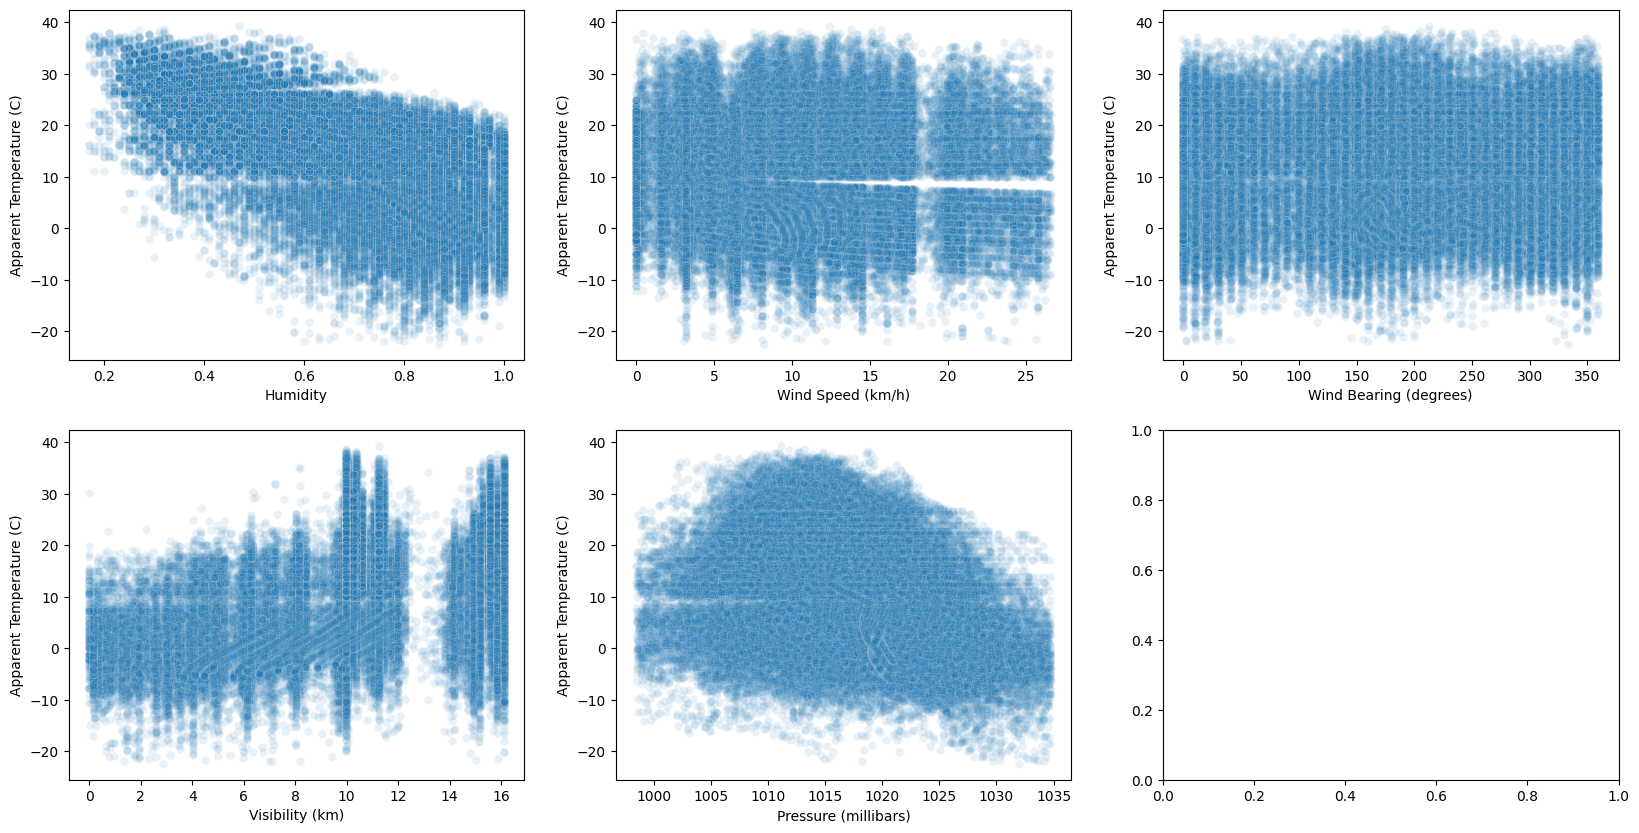

In [33]:
# Linearity
num_atts = data_cleaned.select_dtypes(exclude=['object']).columns # numeric attributes' data type are not object
num_atts = num_atts.delete(0) # drop Apparent Temperature (target variable)

fig, axes = plt.subplots(int(np.ceil(len(num_atts)/3)), 3, figsize = (20, 10))
for i, att in zip(range(len(num_atts)), num_atts):
    sns.scatterplot(ax = axes[int(np.floor(i/3))][i%3], 
                    x = att, y = 'Apparent Temperature (C)', data = data_cleaned,
                    alpha = 0.1)

For this practice, we will accept these 'somewhat' linear variables.

## Multicollinearity
We check the multicollinearity using VIF (variance inflation factor).

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[num_atts]
vif = pd.DataFrame()
vif['features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif

,features,VIF
0,Humidity,18.030807
1,Wind Speed (km/h),4.231785
2,Wind Bearing (degrees),4.065039
3,Visibility (km),8.465787
4,Pressure (millibars),40.115099


We drop variables with a VIF value: 'Pressure (millibars)'.

Since we will not use 'Pressure (millibars)' variables, it is safe to use the data before removing 'Pressure (millibars)' outliers for the next steps.

In [35]:
data_no_multicollinearity = data_3.copy()
data_no_multicollinearity = data_no_multicollinearity.drop(['Pressure (millibars)'], axis = 1)

## Create dummy variables
Next, we will represent the categorical variables as numerical variables by creating dummy variables.

In [37]:
data_preprocessed = pd.get_dummies(data_no_multicollinearity, drop_first = True)
data_preprocessed.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Precip Type_snow
0,7.388889,0.89,14.1197,251.0,15.8263,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,7.227778,0.86,14.2646,259.0,15.8263,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,9.377778,0.89,3.9284,204.0,14.9569,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,5.944444,0.83,14.1036,269.0,15.8263,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,6.977778,0.83,11.0446,259.0,15.8263,False,False,False,False,False,False,False,False,False,True,False,False,False,False


## Linear Regression
Declare the inputs and the targets

In [38]:
targets = data_preprocessed['Apparent Temperature (C)']
inputs = data_preprocessed.drop(['Apparent Temperature (C)'], axis = 1)

### Scale the data

We need to scale the values in the variables so that a big number does not significantly affect the model just because of its value. We use StandardScaler from sklearn for this process, where we apply the following function to each value.

z = 
(x
−
μ)/
s
 ,

where  
x
  is the initial value,  
μ
  is mean of the samples,  
s
  is standard deviation of the samples, and  
z
  is the standardized value.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

inputs_scaled = scaler.transform(inputs)

## Train Test Split
To test the performance of the linear regression model, we split all data into the training set and testing set with an 8:2 ratio.

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2)

## Create the regression

In [41]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [42]:
y_hat = reg.predict(x_train)

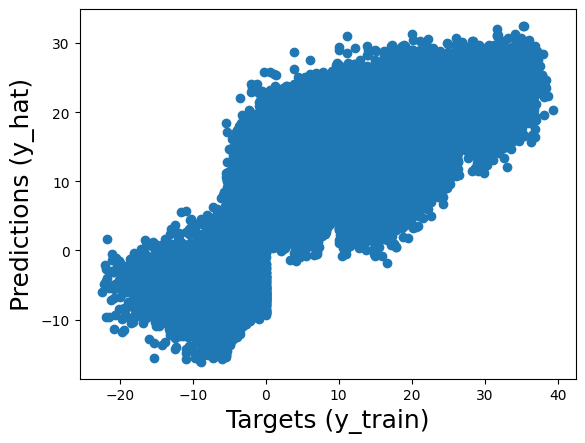

In [43]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residual PDF')

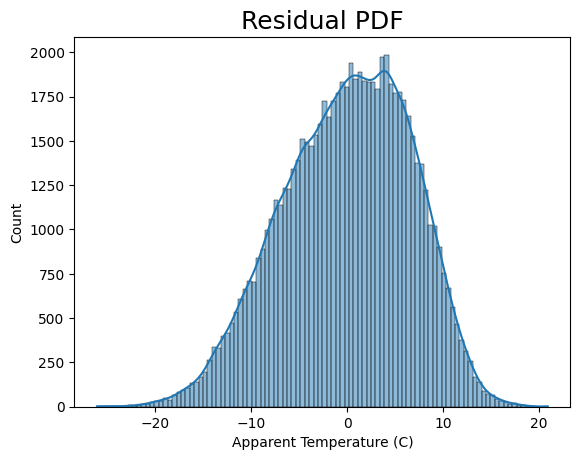

In [44]:
sns.histplot((y_train - y_hat), kde = True)
plt.title('Residual PDF', size = 18)

The residual graph shows the distribution of differences between targets and predictions. The residual graph forms a normal distribution; the estimates with residues near 0 have the highest frequency, though the highest frequency is not precisely on 0.

This fairly normally distributed graph validates the heteroscedasticity requisite to perform the linear regression.

In [45]:
# Coefficient of determination
reg.score(x_train, y_train)

0.609923440272212

Coefficient of determination suggests that 60% of the dependent variable is predicted by the independent variables.

## Finding the weights and bias

In [46]:
reg.intercept_

10.980650418827182

In [47]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Humidity,-5.444486
1,Wind Speed (km/h),-1.915013
2,Wind Bearing (degrees),0.280785
3,Visibility (km),0.711023
4,Summary_Drizzle,0.045013
5,Summary_Dry,0.052596
6,Summary_Dry and Mostly Cloudy,0.015104
7,Summary_Dry and Partly Cloudy,0.026439
8,Summary_Foggy,0.144970
9,Summary_Humid and Mostly Cloudy,0.263021


In contrast to 'Precip Type', the rest of the dummy variables do not significantly affect the model.

Develop by:<br>
Md. Sairul Islam <br>
Linkdin : https://lnkd.in/gacsTX2s <br>
Facebook: https://lnkd.in/gkDRZ7sf <br>
GitHub: https://lnkd.in/gi7j2PxZ <br>
Portfolio: https://lnkd.in/gBYJMNTq 